
[測定データの厄介なバックグラウンドを関数定義なしでいい感じに分離できるすごいアルゴリズム「BEADS」](https://qiita.com/skotaro/items/d943bc9a50da9410e9cb)


途中

In [4]:
import os
# import time
# from datetime import datetime
# from pprint import pprint
from pathlib import Path

import pandas as pd
from pandas import Series, DataFrame

# import scipy as sp
# from scipy.optimize import leastsq
import numpy as np

import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('whitegrid')
# %matplotlib inline

# #高解像度の設定（きれいな図が出力されますがファイルサイズが大きくなります）
# %config InlineBackend.figure_formats = {'png', 'retina'}


# from sklearn.externals import joblib

In [7]:
df_rc500 = pd.read_csv('data/rc_500_1500.csv')
df_rc700 = pd.read_csv('data/rc_700_1500.csv')

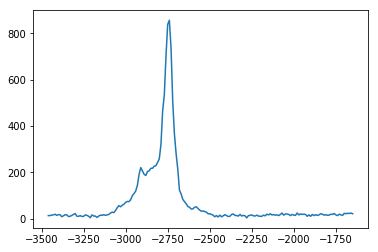

In [6]:
plt.plot(df_rc500['x'],df_rc500['y'])

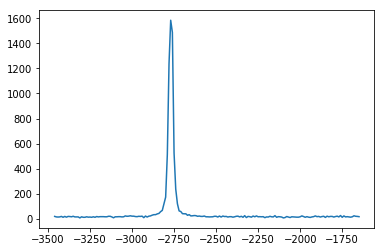

In [8]:
plt.plot(df_rc700['x'],df_rc700['y'])

[pythonを使ったバックグラウンド強度の評価法いろいろ](https://dxlontheroad.com/blog/2018/06/21/python_background_estimation/)

Clays and Clay Minerals, 45, 132-146, 1997.

In [ ]:
#まずはスタート地点（init_ang）を指定する。conv_lineは値を行番号に変換する定義関数。意外と便利というかよく使う。
init_ang = 9.5
init_ang = conv_line(pwd,init_ang)
lipbkg = fit_lip(pwd,init_ang)

#バックグラウンド演算の関数fit_lip()。lipbkgにバックグラウンドのデータを詰めていく。
def fit_lip(pwd,init_ang):
  pwd = pwd.astype(float)
  plt.plot(pwd[:,0],pwd[:,1])
  step = 1
  init_loop = init_ang-1
  lipbkg = pwd[:,1]

#バックグラウンドを決める直線を引き直すためのループ。回数はデータ次第だけどある程度大きければ良いはず、適当。
  for j in range(100):
    init_loop = init_loop+step+1

#直線の開始地点がデータポイントの行数を超えたらループ終了。この場合５８２だったけどもちろんデータ次第。
    if init_loop > 582:
      print ('break')
      break
#バックグラウンドの直線とデータのカーブが接しているかチェックするループ。直線は単純に一次関数で定義して、傾きを１０ずつ変えている。データ次第で刻みは適宜調整する必要がある。
    for i in range(40):
      slope = -(i*10)
      sec = pwd[init_loop,1] - slope*pwd[init_loop,0]
      linear = slope*pwd[init_loop:,0]+sec
      #plt.plot(pwd[init_loop:,0],linear,alpha=0.2)
      diff = pwd[init_loop:,1]-linear
      step = 1
#生データと直線の差分の最小値がプラスになったところで直線とカーブが接していると判断。argpartitionで何個目のデータポイントで接しているのかIndexを抜き出して、バックグラウンドの強度を得るのと次のループでのスタート地点を決めるのに利用。
      if np.nanmin(diff[1:]) > 0:
        step = np.argpartition(diff[1:],0)[0]
        print('i,j',i,j)
        lipbkg[init_loop:init_loop+step+2] = linear[0:step+2]
        break

  plt.plot(pwd[:,0],lipbkg[:])
  plt.show()

  return lipbkg

#データの値と行番号を変換する関数。差分の一番小さくなるIndexをargpartitionで抜き出すだけ。よく使うので比較的速度の速いargpartitionで。
def conv_line(plot,num):
  num = float(num)
  dif = np.absolute(plot-num)
  mini = np.argpartition(dif,0,axis=0)
  return mini[0][0]